In [1]:
def periodically_continued(a, b):
    interval = b - a
    return lambda f: lambda x: f((x - a) % interval + a)

@periodically_continued(-1, 1)
def f(x):
    return x

g = periodically_continued(0, 1)(lambda x: -x)

assert f(2.5) == 0.5
assert g(2.5) == -0.5




0.333333333333334
0
Piecewise((0, x < 0), (x - pi, x < pi))
Piecewise((x, x > 0), (1/x, True))


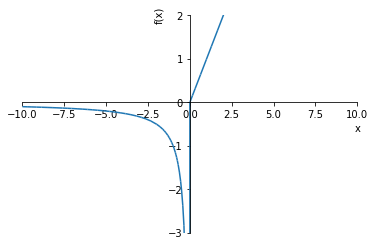

In [2]:
import sympy as sp

x = sp.Symbol('x')

phi_1 = sp.Piecewise(
    (0, x < 1),
    (0, x > 1.3),
    ( (1.3-x)/0.3, True )
)

print(phi_1.subs(x,1.2)) # 0.333333333333334

print(phi_1.subs(x,1.4)) # 0
%matplotlib inline
from sympy.plotting import plot
#plot(phi_1,xlim=(0.9,1.4))
g=sp.Piecewise(
    (0,x<0),
    (x-sp.pi, x<sp.pi)
)
print(g)
#plot(g) #No representa la funcion


p8 = sp.Piecewise((x, x > 0), (1/x, True))
print(p8)
plot(p8,ylim=(-3,2))

- Ejemplo Series de Fourier
$$
g(x)= 
\left\{
\begin{array}{ll}
0 & \mbox{si  }  -\pi <x<0\\
\pi-x & \mbox{si  }  0 <x<\pi\\
& \mbox{estendida con periodo } 2\pi
\end{array}\\
\right. 
$$

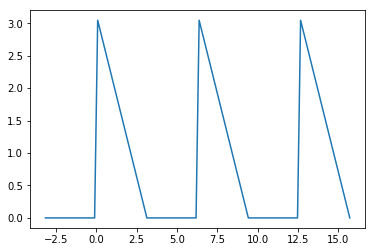

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
def f(x):
    a=-np.pi
    b=np.pi
    interval=b-a
    s=(x - a) % interval + a
    return 0*(s<0)+(np.pi-s)*(s>=0)

x = np.linspace(-1*np.pi, 5*np.pi,100)
y=f(x)
plt.plot(x,f(x))


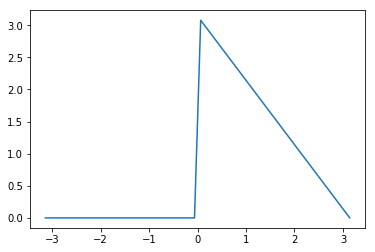

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

x = np.linspace(-np.pi, np.pi)
y = np.piecewise(x, [x<0, x>=0], [lambda x: 0, lambda x: np.pi-x])

plt.plot(x, y,'-')

plt.show()

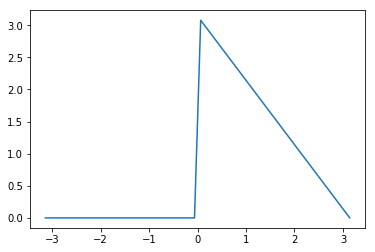

In [5]:
def f(x): return 0*(x<0)+(np.pi-x)*(x>0)
plt.plot(x,f(x))

1
sin(x) + 2*cos(x)/pi + pi/4


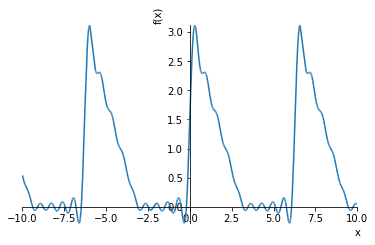

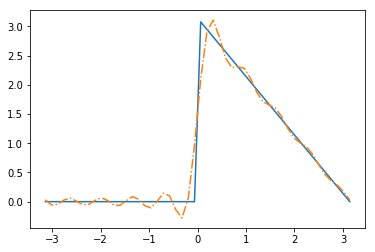

In [9]:
import sympy as sp
x=sp.symbols('x')
g1=0
g2=sp.pi-x
T=2*sp.pi
w=2*sp.pi/T
print(w)
a0=2/T * (sp.integrate(g1,(x,-sp.pi,0))+sp.integrate(g2,(x,0,sp.pi)))
serie=a0/2.
n=10
for k in range(1,n):
    ak=2/T* (sp.integrate(g1*sp.cos(k*w*x),(x,-sp.pi,0))+sp.integrate(g2*sp.cos(k*w*x),(x,0,sp.pi)))
    bk=2/T* (sp.integrate(g1*sp.sin(k*w*x),(x,-sp.pi,0))+sp.integrate(g2*sp.sin(k*w*x),(x,0,sp.pi)))
    serie+=ak*sp.cos(k*w*x)+bk*sp.sin(k*w*x)
#print(serie)

S1=sp.pi/4+2/sp.pi*sp.cos(x)+ sp.sin(x)
print(S1)

from sympy.plotting import plot
plot(serie)
gserie=sp.lambdify(x,serie)
gseries=np.vectorize(gserie)

import numpy as np
import matplotlib.pyplot as plt 

x = np.linspace(-np.pi, np.pi)
def f(x): return 0*(x<0)+(np.pi-x)*(x>0)
plt.plot(x,f(x))
plt.plot(x,gseries(x),'-.')


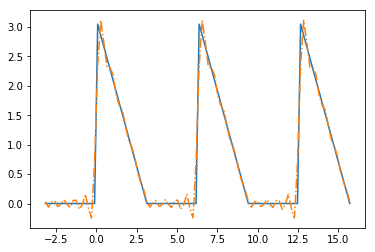

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
def f(x):
    a=-np.pi
    b=np.pi
    interval=b-a
    s=(x - a) % interval + a
    return 0*(s<0)+(np.pi-s)*(s>=0)

x = np.linspace(-1*np.pi, 5*np.pi,100)
y=f(x)
plt.plot(x,f(x))

plt.plot(x,gseries(x),'-.')